# Day 6

## Part 1
You've landed at the Universal Orbit Map facility on Mercury. Because navigation in space often involves transferring between orbits, the orbit maps here are useful for finding efficient routes between, for example, you and Santa. You download a map of the local orbits (your puzzle input).

Except for the universal Center of Mass (COM), every object in space is in orbit around exactly one other object. An orbit looks roughly like this:

```
                  \
                   \
                    |
                    |
AAA--> o            o <--BBB
                    |
                    |
                   /
                  /
```

In this diagram, the object BBB is in orbit around AAA. The path that BBB takes around AAA (drawn with lines) is only partly shown. In the map data, this orbital relationship is written AAA)BBB, which means "BBB is in orbit around AAA".

Before you use your map data to plot a course, you need to make sure it wasn't corrupted during the download. To verify maps, the Universal Orbit Map facility uses orbit count checksums - the total number of direct orbits (like the one shown above) and indirect orbits.

Whenever A orbits B and B orbits C, then A indirectly orbits C. This chain can be any number of objects long: if A orbits B, B orbits C, and C orbits D, then A indirectly orbits D.

For example, suppose you have the following map:

```
COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L
```

Visually, the above map of orbits looks like this:


```
        G - H       J - K - L
       /           /
COM - B - C - D - E - F
               \
                I
```

In this visual representation, when two objects are connected by a line, the one on the right directly orbits the one on the left.

Here, we can count the total number of orbits as follows:

- D directly orbits C and indirectly orbits B and COM, a total of 3 orbits.
- L directly orbits K and indirectly orbits J, E, D, C, B, and COM, a total of 7 orbits.
- COM orbits nothing.

The total number of direct and indirect orbits in this example is 42.

What is the total number of direct and indirect orbits in your map data?

In [ ]:
# from treelib import Tree, Node

# # orbit_map = [orbit.split(')') for orbit in ['COM)B', 'B)C','C)D','D)E',
# #                                             'E)F','B)G','G)H','D)I',
# #                                             'E)J','J)K','K)L']]

# orbit_map = [pair.replace('\n', '').split(')') for pair in open('../Inputs/day6_input.txt').readlines()]

# # construct tree
# tree = Tree()

# # add first node to tree
# tree.create_node(tag = orbit_map[0][0], identifier = orbit_map[0][0])

# # add following nodes with parents
# while len(tree.all_nodes()) < 2000:
#     for orbit in orbit_map:
#         if orbit[0] in [node.identifier for node in tree.all_nodes()] and orbit[1] not in [node.identifier for node in tree.all_nodes()]:
#             tree.create_node(tag = orbit[1], identifier = orbit[1], 
#                          parent = orbit[0])


# # for all non leaf nodes, count children
# direct_orbit_sum = 0
# for node in tree.all_nodes():
#     if node not in tree.leaves():
#         direct_orbit_sum += len(tree.children(node.identifier))

# # for all non leaf nodes, count descendants of children
# indirect_orbit_sum = 0


In [4]:
import networkx as nx

In [59]:
# orbit_map = [orbit.split(')') for orbit in ['COM)B', 'B)C','C)D','D)E',
#                                             'E)F','B)G','G)H','D)I',
#                                             'E)J','J)K','K)L']]

orbit_map = [pair.replace('\n', '').split(')') for pair in open('../Inputs/day6_input.txt').readlines()]

g = nx.DiGraph()

for orbit in orbit_map:
    if orbit[0] not in g.nodes():
        g.add_node(orbit[0])
        
    if orbit[1] not in g.nodes():
        g.add_node(orbit[1])
        
    g.add_edge(orbit[0], orbit[1])



In [66]:
count = 0
for node1 in g.nodes():
    for node2 in g.nodes():
        if nx.algorithms.shortest_paths.generic.has_path(g, node1, node2):
            count += 1

print(count - len(g.nodes()))

387356


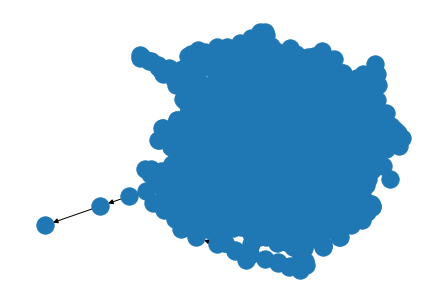

In [34]:
import matplotlib.pyplot as plt
nx.draw(g, with_labels=False, font_weight='bold')
plt.show()

## Part 2
Now, you just need to figure out how many orbital transfers you (YOU) need to take to get to Santa (SAN).

You start at the object YOU are orbiting; your destination is the object SAN is orbiting. An orbital transfer lets you move from any object to an object orbiting or orbited by that object.

For example, suppose you have the following map:

```
COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L
K)YOU
I)SAN
```

Visually, the above map of orbits looks like this:

```
                          YOU
                         /
        G - H       J - K - L
       /           /
COM - B - C - D - E - F
               \
                I - SAN
```

In this example, YOU are in orbit around K, and SAN is in orbit around I. To move from K to I, a minimum of 4 orbital transfers are required:

- K to J
- J to E
- E to D
- D to I

Afterward, the map of orbits looks like this:

```
        G - H       J - K - L
       /           /
COM - B - C - D - E - F
               \
                I - SAN
                 \
                  YOU
```

What is the minimum number of orbital transfers required to move from the object YOU are orbiting to the object SAN is orbiting? (Between the objects they are orbiting - not between YOU and SAN.)

In [79]:
# subtract 2 because you're doing the object YOU are orbiting and the object SAN is orbiting, 
# not between YOU and SAN, as the directions state. 
nx.algorithms.shortest_paths.weighted.dijkstra_path_length(g.to_undirected(), 'SAN', 'YOU') - 2

532